# BATCH SIZE FINDER

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

In [27]:
import numpy as np
import pandas as pd

ModuleNotFoundError: No module named 'pandas'

In [27]:
# Number of GPUs based on node count (1 node has 8 GPUs, and we consider up to 8 nodes)
nb_gpus = np.array([8 * i for i in range(1, 8 + 1)])

# Generate all possible total batch sizes
possible_total_bs = []
for bs_per_gpu in range(1, 20):
    possible_total_bs += list(nb_gpus * bs_per_gpu)

# Remove duplicates and sort the batch sizes
possible_total_bs = sorted(set(possible_total_bs))
print(possible_total_bs)
print()

# Prepare the matrix: Rows are node counts, Columns are total batch sizes
# Each cell will be filled with the batch size per GPU if possible
matrix = np.full((len(nb_gpus), len(possible_total_bs)), np.nan)  # Initialize with NaN

# Calculate batch size per GPU for each combination of node count and total batch size
for i, gpus in enumerate(nb_gpus):
    for j, total_bs in enumerate(possible_total_bs):
        if total_bs % gpus == 0:
            matrix[i, j] = total_bs // gpus  # bs_per_gpu
            
# Convert matrix to DataFrame
df = pd.DataFrame(matrix, index=[f"{i//8}" for i in nb_gpus], columns=possible_total_bs)
df.index.name = 'nb_nodes'
df.columns.name = 'total_bs'

# Filter for total batch sizes of 128 or less
filtered_df = df[df.columns[(df.columns <= 256) & (df.columns >= 88)]]
filtered_df.index.name = 'nb_nodes'
filtered_df.columns.name = 'total_bs'

# Set the maximum number of rows and columns to display
pd.set_option('display.max_columns', None)  # No limit on the number of columns
pd.set_option('display.max_rows', None)  # No limit on the number of rows

# Assuming 'df' is your DataFrame
filtered_df

[8, 16, 24, 32, 40, 48, 56, 64, 72, 80, 88, 96, 104, 112, 120, 128, 136, 144, 152, 160, 168, 176, 192, 200, 208, 216, 224, 240, 256, 264, 272, 280, 288, 304, 312, 320, 336, 352, 360, 384, 392, 400, 408, 416, 432, 440, 448, 456, 480, 504, 512, 520, 528, 544, 560, 576, 600, 608, 616, 624, 640, 672, 680, 704, 720, 728, 760, 768, 784, 816, 832, 840, 864, 896, 912, 952, 960, 1008, 1024, 1064, 1088, 1152, 1216]



total_bs,88,96,104,112,120,128,136,144,152,160,168,176,192,200,208,216,224,240,256
nb_nodes,,,,,,,,,,,,,,,,,,,
1,11.0,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0,22.0,24.0,25.0,26.0,27.0,28.0,30.0,32.0
2,NaN,6.0,NaN,7.0,NaN,8.0,NaN,9.0,NaN,10.0,NaN,11.0,12.0,NaN,13.0,NaN,14.0,15.0,16.0
3,NaN,4.0,NaN,NaN,5.0,NaN,NaN,6.0,NaN,NaN,7.0,NaN,8.0,NaN,NaN,9.0,NaN,10.0,NaN
4,NaN,3.0,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,6.0,NaN,NaN,NaN,7.0,NaN,8.0
5,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,5.0,NaN,NaN,NaN,6.0,NaN
6,NaN,2.0,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,5.0,NaN
7,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,4.0


In [28]:
nb_nodes=2
width=128
total_bs=256

bs_per_gpu = total_bs // nb_nodes // 8
nb_heads = width // 64

cmd = f"python adastra_slurm_job_submit.py -n muP_GPT2_Nodes{nb_nodes}_BSperGPU{bs_per_gpu}_totalBS{total_bs}_dim{width} --gpus_per_node 8 --nodes {nb_nodes}  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.embedding_dim={width} model.network.nb_heads={nb_heads} data.dataloader_params.batch_size={bs_per_gpu} paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_batch_size_finder ++trainer.max_epochs=1 ++trainer.limit_train_batches=10 ++trainer.limit_val_batches=2 data.dataloader_params.num_workers=2'"

In [29]:
print({
    'nb_nodes': nb_nodes,
    'total_bs': total_bs,
    'bs_per_gpu': bs_per_gpu,
    'width': width,
    'nb_heads': nb_heads,
})
print(cmd)

{'nb_nodes': 2, 'total_bs': 256, 'bs_per_gpu': 16, 'width': 128, 'nb_heads': 2}
python adastra_slurm_job_submit.py -n muP_GPT2_Nodes2_BSperGPU16_totalBS256_dim128 --gpus_per_node 8 --nodes 2  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.embedding_dim=128 model.network.nb_heads=2 data.dataloader_params.batch_size=16 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_batch_size_finder ++trainer.max_epochs=1 ++trainer.limit_train_batches=10 ++trainer.limit_val_batches=2 data.dataloader_params.num_workers=2'


data.dataloader_params.num_workers=4 doesn't work !

## For a given model and total batch size find the minimum nb of nodes that fits in memory

> max_epochs=1 limit_train_batches=10 limit_val_batches=2

### width = 4096 - 2.4 B

{'nb_nodes': 8, 'total_bs': 128, 'bs_per_gpu': 2, 'width': 4096, 'nb_heads': 64} -> 841865

python adastra_slurm_job_submit.py -n muP_GPT2_Nodes8_BSperGPU2_totalBS128_dim4096 --gpus_per_node 8 --nodes 8  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.embedding_dim=4096 model.network.nb_heads=64 data.dataloader_params.batch_size=2 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_batch_size_finder ++trainer.max_epochs=1 ++trainer.limit_train_batches=10 ++trainer.limit_val_batches=2 data.dataloader_params.num_workers=2'

result -> Epoch 0: 10/10 [02:03<00:00,  0.08it/s

on_train_batch_end/active_bytes.all.peak -> 29.42 GB

---

{'nb_nodes': 8, 'total_bs': 192, 'bs_per_gpu': 3, 'width': 4096, 'nb_heads': 64} -> 841866

python adastra_slurm_job_submit.py -n muP_GPT2_Nodes8_BSperGPU3_totalBS192_dim4096 --gpus_per_node 8 --nodes 8  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.embedding_dim=4096 model.network.nb_heads=64 data.dataloader_params.batch_size=3 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_batch_size_finder ++trainer.max_epochs=1 ++trainer.limit_train_batches=10 ++trainer.limit_val_batches=2 data.dataloader_params.num_workers=2

result -> Epoch 0: 10/10 [02:46<00:00,  0.06it/s

on_train_batch_end/active_bytes.all.peak -> 40.97 GB

---

{'nb_nodes': 8, 'total_bs': 256, 'bs_per_gpu': 4, 'width': 4096, 'nb_heads': 64} -> 841867

python adastra_slurm_job_submit.py -n muP_GPT2_Nodes8_BSperGPU4_totalBS256_dim4096 --gpus_per_node 8 --nodes 8  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.embedding_dim=4096 model.network.nb_heads=64 data.dataloader_params.batch_size=4 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_batch_size_finder ++trainer.max_epochs=1 ++trainer.limit_train_batches=10 ++trainer.limit_val_batches=2 data.dataloader_params.num_workers=2'

result -> Epoch 0: 10/10 [03:28<00:00,  0.05it/s

on_train_batch_end/active_bytes.all.peak -> 52.52 GB


### width = 128 - 2.6 M

{'nb_nodes': 1, 'total_bs': 256, 'bs_per_gpu': 32, 'width': 128, 'nb_heads': 2} -> 841904

python adastra_slurm_job_submit.py -n muP_GPT2_Nodes1_BSperGPU32_totalBS256_dim128 --gpus_per_node 8 --nodes 1  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.embedding_dim=128 model.network.nb_heads=2 data.dataloader_params.batch_size=32 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_batch_size_finder ++trainer.max_epochs=1 ++trainer.limit_train_batches=10 ++trainer.limit_val_batches=2 data.dataloader_params.num_workers=2'

result -> Epoch 0: 10/10 [00:53<00:00,  0.19it/s

on_train_batch_end/active_bytes.all.peak -> 13.87 GB

### width = 256 - 9.9 M

{'nb_nodes': 1, 'total_bs': 256, 'bs_per_gpu': 32, 'width': 256, 'nb_heads': 4} -> 841907

python adastra_slurm_job_submit.py -n muP_GPT2_Nodes1_BSperGPU32_totalBS256_dim256 --gpus_per_node 8 --nodes 1  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.embedding_dim=256 model.network.nb_heads=4 data.dataloader_params.batch_size=32 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_batch_size_finder ++trainer.max_epochs=1 ++trainer.limit_train_batches=10 ++trainer.limit_val_batches=2 data.dataloader_params.num_workers=2

result -> 10/10 [01:08<00:00,  0.15it/s

on_train_batch_end/active_bytes.all.peak -> 25.42 GB'

### width = 512 - 38.7 M

{'nb_nodes': 1, 'total_bs': 256, 'bs_per_gpu': 32, 'width': 512, 'nb_heads': 8} -> 841909

python adastra_slurm_job_submit.py -n muP_GPT2_Nodes1_BSperGPU32_totalBS256_dim512 --gpus_per_node 8 --nodes 1  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.embedding_dim=512 model.network.nb_heads=8 data.dataloader_params.batch_size=32 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_batch_size_finder ++trainer.max_epochs=1 ++trainer.limit_train_batches=10 ++trainer.limit_val_batches=2 data.dataloader_params.num_workers=2

result -> 10/10 [02:18<00:00,  0.07it/s
on_train_batch_end/active_bytes.all.peak -> 48.33 GB'

**Conclusion** -> total BS = 256 is able to fit on one node for width=128,256,512 and 8 nodes for 4096

## Total BS = 256 -- width = 128 -- Nodes = 1 -- GPUs = ?

width = 128 - 2.6 M only consume  width = 128 - 13.87 GB

Let's fix 1 node and see vary # of GPU and this the variation in processing speed

In [30]:
nb_gpus=8
width=128
total_bs=256

if total_bs % nb_gpus != 0:
    print("not a valid # of GPUs!")

bs_per_gpu = total_bs // nb_gpus
nb_heads = width // 64

cmd = f"python adastra_slurm_job_submit.py -n muP_GPT2_Nodes{nb_nodes}_BSperGPU{bs_per_gpu}_totalBS{total_bs}_dim{width} --gpus_per_node {nb_gpus} --nodes 1  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.embedding_dim={width} model.network.nb_heads={nb_heads} data.dataloader_params.batch_size={bs_per_gpu} paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_batch_size_finder ++trainer.max_epochs=1 data.dataloader_params.num_workers=2'"

In [31]:
print({
    'nb_gpus': nb_gpus,
    'total_bs': total_bs,
    'bs_per_gpu': bs_per_gpu,
    'width': width,
    'nb_heads': nb_heads,
})
print(cmd)

{'nb_gpus': 8, 'total_bs': 256, 'bs_per_gpu': 32, 'width': 128, 'nb_heads': 2}
python adastra_slurm_job_submit.py -n muP_GPT2_Nodes2_BSperGPU32_totalBS256_dim128 --gpus_per_node 8 --nodes 1  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.embedding_dim=128 model.network.nb_heads=2 data.dataloader_params.batch_size=32 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_batch_size_finder ++trainer.max_epochs=1 data.dataloader_params.num_workers=2'


{'nb_gpus': 8, 'total_bs': 256, 'bs_per_gpu': 32, 'width': 128, 'nb_heads': 2} -> 842184

python adastra_slurm_job_submit.py -n muP_GPT2_Nodes1_BSperGPU32_totalBS256_dim128 --gpus_per_node 8 --nodes 1  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.embedding_dim=128 model.network.nb_heads=2 data.dataloader_params.batch_size=32 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_batch_size_finder ++trainer.max_epochs=1 data.dataloader_params.num_workers=2'
result --> 105/9857 [55:10<85:24:55,  0.03it/s

---

{'nb_gpus': 8, 'total_bs': 256, 'bs_per_gpu': 32, 'width': 128, 'nb_heads': 2} -> 842296

python adastra_slurm_job_submit.py -n muP_GPT2_Nodes1_BSperGPU32_totalBS256_dim128 --gpus_per_node 8 --nodes 1  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.embedding_dim=128 model.network.nb_heads=2 data.dataloader_params.batch_size=32 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_batch_size_finder ++trainer.max_epochs=1 data.dataloader_params.num_workers=**4**'

result --> 

---

{'nb_nodes': **2**, 'total_bs': 256, 'bs_per_gpu': 16, 'width': 128, 'nb_heads': 2} -> 842297

python adastra_slurm_job_submit.py -n muP_GPT2_Nodes2_BSperGPU16_totalBS256_dim128 --gpus_per_node 8 --nodes 2  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.embedding_dim=128 model.network.nb_heads=2 data.dataloader_params.batch_size=16 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_batch_size_finder ++trainer.max_epochs=  data.dataloader_params.num_workers=2'
result --> 



---


{'nb_gpus': 4, 'total_bs': 256, 'bs_per_gpu': 64, 'width': 128, 'nb_heads': 2} ->8421833

python adastra_slurm_job_submit.py -n muP_GPT2_Nodes1_BSperGPU64_totalBS256_dim128 --gpus_per_node 4 --nodes 1  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.embedding_dim=128 model.network.nb_heads=2 data.dataloader_params.batch_size=64 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_batch_size_finder ++trainer.max_epochs=  data.dataloader_params.num_workers**1**2

cpu-per-task=

result --> cpu OOM

---

{'nb_gpus': 2, 'total_bs': 256, 'bs_per_gpu': 64, 'width': 128, 'nb_heads': 2} -> 841986

python adastra_slurm_job_submit.py -n muP_GPT2_Nodes1_BSperGPU64_totalBS256_dim128 --gpus_per_node 4 --nodes 1  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.embedding_dim=128 model.network.nb_heads=2 data.dataloader_params.batch_size=64 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_batch_size_finder ++trainer.max_epochs=1 data.dataloader_params.num_workers=**1**'

cpu-per-task=44

result --> Epoch 0:   2%|▏         | 235/9857 [2:46:35<113:40:43,  0.02it/s''

### Conclu -> keep full node + num_workers=2

# Grid search command generator

In [34]:
num_random_combinations = 50
sampled_lr = 10**np.random.uniform(low=-3, high=-1, size=num_random_combinations)
sampled_std_inits = 10**np.random.uniform(low=-2, high=-0.3, size=num_random_combinations)

random_search_parameters = np.column_stack((sampled_std_inits, sampled_lr))

In [35]:
np.sort(sampled_lr)

array([0.00101722, 0.00109254, 0.00112414, 0.001598  , 0.00172037,
       0.00183331, 0.00193819, 0.00215789, 0.00247782, 0.00253056,
       0.002867  , 0.00287897, 0.00351773, 0.00358468, 0.0036805 ,
       0.00481631, 0.00496094, 0.00562509, 0.00592728, 0.00637972,
       0.00670215, 0.00720943, 0.00762465, 0.00849733, 0.00899038,
       0.01062442, 0.0109397 , 0.01263886, 0.01548034, 0.015871  ,
       0.01758214, 0.01759663, 0.02088786, 0.02430179, 0.03316418,
       0.03430897, 0.03663183, 0.03891128, 0.0439773 , 0.04685533,
       0.04845384, 0.05116419, 0.05775924, 0.06115257, 0.06608657,
       0.07234456, 0.07249433, 0.07426086, 0.08927848, 0.09736749])

In [36]:
np.sort(sampled_std_inits)

array([0.01046529, 0.01194295, 0.01254774, 0.01321698, 0.01351059,
       0.01483554, 0.01584097, 0.01617328, 0.02290982, 0.02751258,
       0.03540998, 0.037944  , 0.04394632, 0.04442045, 0.0484209 ,
       0.05262914, 0.05519558, 0.05522259, 0.05710418, 0.05890853,
       0.07386627, 0.07920697, 0.08329335, 0.08492462, 0.08517228,
       0.097009  , 0.10071162, 0.10416863, 0.1045302 , 0.10569565,
       0.10976085, 0.12869063, 0.13424518, 0.14076116, 0.14160909,
       0.17589479, 0.18855174, 0.19810235, 0.22521736, 0.23198067,
       0.25824242, 0.26861784, 0.32089696, 0.3445061 , 0.38309087,
       0.42660276, 0.44170362, 0.45006346, 0.45959524, 0.46512693])

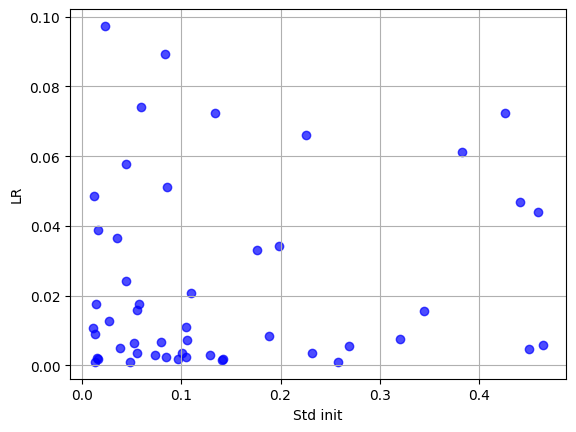

In [37]:
# Create a histogram plot of the data
#plt.hist(data, bins=30, color='blue', alpha=0.7)
plt.scatter(random_search_parameters[:,0],random_search_parameters[:,1], color='blue', alpha=0.7)
plt.xlabel('Std init')
plt.ylabel('LR')
plt.grid(True)
plt.show()

In [96]:
nb_nodes=1
nb_gpus=8*nb_nodes
total_bs=256

s = "#!/bin/bash \n\n"

for width in [128,256]:

    nb_heads = width // 64
    bs_per_gpu = total_bs // nb_gpus
    
    for run_idx, (init_std, lr) in enumerate(random_search_parameters):
    
        cmd = f"python adastra_slurm_job_submit.py -n GS{width}{run_idx:03d}_muP_GPT2_Nodes{nb_nodes}_BSperGPU{bs_per_gpu}_totalBS{total_bs}_dim{width}_std{init_std:.4f}_lr{lr:.4f} --gpus_per_node 8 --nodes {nb_nodes}  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.init_std={init_std:.4f} optimizer.lr={lr:.4f} model.network.embedding_dim={width} model.network.nb_heads={nb_heads} data.dataloader_params.batch_size={bs_per_gpu} paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_grid_search ++trainer.max_epochs=1 data.dataloader_params.num_workers=2'"

        s += cmd
        s += '\n\nsleep 1\n\n'

        if (run_idx + 1) % 10 == 0:
            section_factor = step = (run_idx + 1) // 10
            run_idx_range = f'{(section_factor - 1) * 10}-{section_factor * 10 - 1}'
            print(f'{width}_{run_idx_range}')
            with open(f'./GS_{width}_{run_idx_range}.sh', 'w') as f:
                f.write(s)
            s = "#!/bin/bash \n\n"
        

128_0-9
128_10-19
128_20-29
128_30-39
128_40-49
256_0-9
256_10-19
256_20-29
256_30-39
256_40-49


In [101]:
!cat ./GS_128_0-9.sh

#!/bin/bash 

python adastra_slurm_job_submit.py -n GS128000_muP_GPT2_Nodes1_BSperGPU32_totalBS256_dim128_std0.0229_lr0.0974 --gpus_per_node 8 --nodes 1  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.init_std=0.0229 optimizer.lr=0.0974 model.network.embedding_dim=128 model.network.nb_heads=2 data.dataloader_params.batch_size=32 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_grid_search ++trainer.max_epochs=1 data.dataloader_params.num_workers=2'

sleep 1

python adastra_slurm_job_submit.py -n GS128001_muP_GPT2_Nodes1_BSperGPU32_totalBS256_dim128_std0.1098_lr0.0209 --gpus_per_node 8 --nodes 1  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.init_std=0.1098 optimizer.lr=0.0209 model.network.embedding_dim=128 model.network.nb_heads=2 data.dataloader_params.batch_size=32 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_grid_search ++trainer.max_epochs=1 data.dataloader_params.num_workers=2'

sleep

# Generation of one command

In [38]:
nb_nodes=4
nb_gpus=8*nb_nodes
total_bs=256

s = "#!/bin/bash \n\n"

width = 512

nb_heads = width // 64
bs_per_gpu = total_bs // nb_gpus

init_std=0.1045
lr = 0.0109

output_dir = '/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_grid_search_iter1'

cmd = f"python adastra_slurm_job_submit.py -n muP_GPT2_Nodes{nb_nodes}_BSperGPU{bs_per_gpu}_totalBS{total_bs}_dim{width}_std{init_std:.4f}_lr{lr:.4f} --gpus_per_node 8 --nodes {nb_nodes}  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.init_std={init_std:.4f} optimizer.lr={lr:.4f} model.network.embedding_dim={width} model.network.nb_heads={nb_heads} data.dataloader_params.batch_size={bs_per_gpu} paths.output_dir={output_dir} ++trainer.max_epochs=1 data.dataloader_params.num_workers=2'"
print(cmd)

python adastra_slurm_job_submit.py -n muP_GPT2_Nodes4_BSperGPU8_totalBS256_dim512_std0.1045_lr0.0109 --gpus_per_node 8 --nodes 4  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.init_std=0.1045 optimizer.lr=0.0109 model.network.embedding_dim=512 model.network.nb_heads=8 data.dataloader_params.batch_size=8 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_grid_search_iter1 ++trainer.max_epochs=1 data.dataloader_params.num_workers=2'


---

width 512 | 4 nodes -> 845070

```
python adastra_slurm_job_submit.py -n muP_GPT2_Nodes4_BSperGPU8_totalBS256_dim512_std0.1045_lr0.0109 --gpus_per_node 8 --nodes 4  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.init_std=0.1045 optimizer.lr=0.0109 model.network.embedding_dim=512 model.network.nb_heads=8 data.dataloader_params.batch_size=8 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_grid_search_iter1 ++trainer.max_epochs=1 data.dataloader_params.num_workers=2'
```

width 2048 | 8 nodes -> 845071

```
python adastra_slurm_job_submit.py -n muP_GPT2_Nodes8_BSperGPU4_totalBS256_dim2048_std0.1045_lr0.0109 --gpus_per_node 8 --nodes 8  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.init_std=0.1045 optimizer.lr=0.0109 model.network.embedding_dim=2048 model.network.nb_heads=32 data.dataloader_params.batch_size=4 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_grid_search_iter1 ++trainer.max_epochs=1 data.dataloader_params.num_workers=2'
```

width 4096 | 8 nodes -> 845072

```
python adastra_slurm_job_submit.py -n muP_GPT2_Nodes8_BSperGPU4_totalBS256_dim4096_std0.1045_lr0.0109 --gpus_per_node 8 --nodes 8  -p 'experiment=muP_GPT2_vqgan_imagenet_f16_1024 model.network.init_std=0.1045 optimizer.lr=0.0109 model.network.embedding_dim=4096 model.network.nb_heads=64 data.dataloader_params.batch_size=4 paths.output_dir=/lus/work/CT10/cin4181/SHARED/output_data/next_token_predictor_grid_search_iter1 ++trainer.max_epochs=1 data.dataloader_params.num_workers=2'
```

# Computing WSD params given total number of steps

In [ ]:
scancel 844323
scancel 844336
scancel 844332
scancel 844354
scancel 844355
scancel 844359
scancel 844328
scancel 844341
scancel 844345
scancel 844366
scancel 844367
scancel 844371
scancel 844379
scancel 844389

In [19]:
len_dataset = 2523392
total_bs = 256

In [20]:
total_nb_steps = len_dataset // total_bs

In [21]:
print('25%: ', int(nb_steps * 0.25))
print('50%: ',int(nb_steps * 0.5))
print('75%: ',int(nb_steps * 0.75))
print('100%: ',nb_steps)

25%:  2464
50%:  4928
75%:  7392
100%:  9857


In [22]:
end_iter = total_nb_steps
warmup_iter = int(end_iter * 0.01) # 1%
drop_iter = int(end_iter * 0.1) # 10%

In [23]:
print({
    'warmup_iter': 8960 // 256, # total_batch_size * 35 = 256 * 35
    'end_iter': nb_steps,
    'drop_iter': drop_iter // 256
})

{'warmup_iter': 35, 'end_iter': 9857, 'drop_iter': 3}


# Testing checkpointing at specific steps 

In [3]:
import os
import torch
from torch.utils.data import DataLoader, TensorDataset
import lightning.pytorch as pl
from lightning.pytorch.callbacks import ModelCheckpoint

In [4]:
# Ensure the checkpoint directory exists
os.makedirs('checkpoints', exist_ok=True)

In [11]:
# Define a simple model
class SimpleModel(pl.LightningModule):
    def __init__(self):
        super().__init__()
        self.layer = torch.nn.Linear(10, 1)

    def forward(self, x):
        return self.layer(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = torch.nn.functional.mse_loss(y_hat, y)
        self.log('train_loss', loss)
        return loss

    def configure_optimizers(self):
        return torch.optim.Adam(self.parameters(), lr=0.02)

    def train_dataloader(self):
        # Creating a dummy dataset
        x = torch.randn(1000, 10)
        y = torch.randn(1000, 1)
        dataset = TensorDataset(x, y)
        return DataLoader(dataset, batch_size=10)



In [12]:
# Set up the checkpoint callback
checkpoint_callback = ModelCheckpoint(
    dirpath='./checkpoints',
    filename='checkpoint-{epoch:02d}-{step:04d}',
    every_n_train_steps=25,
    save_top_k=-1
)

# Set up the trainer
trainer = pl.Trainer(
    callbacks=[checkpoint_callback],
    max_epochs=2,
    limit_train_batches=100,  # Limit the number of batches for quick testing
)

# Instantiate the model
model = SimpleModel()

# Train the model
trainer.fit(model)

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name  | Type   | Params
---------------------------------
0 | layer | Linear | 11    
---------------------------------
11        Trainable params
0         Non-trainable params
11        Total params
0.000     Total estimated model params size (MB)


Training: |                                                                                       | 0/? [00:00…

`Trainer.fit` stopped: `max_epochs=2` reached.


In [13]:
!ls checkpoints

'checkpoint-epoch=00-step=0025.ckpt'  'checkpoint-epoch=01-step=0125.ckpt'
'checkpoint-epoch=00-step=0050.ckpt'  'checkpoint-epoch=01-step=0150.ckpt'
'checkpoint-epoch=00-step=0075.ckpt'  'checkpoint-epoch=01-step=0175.ckpt'
'checkpoint-epoch=00-step=0100.ckpt'  'checkpoint-epoch=01-step=0200.ckpt'


In [10]:
rm checkpoints/*

# Testing WSD learning scheduler

In [28]:
from typing import Dict, Any

class WarmupStableDrop:
    def __init__(
        self, start_lr, warmup_iter, end_iter, drop_iter=0, num_iter=-1,
    ) -> None:
        self.warmup_iter = warmup_iter
        self.end_iter = end_iter
        self.drop_iter = drop_iter
        self.num_iter = num_iter
        self._current_lr = None
        self._start_lr = start_lr
        self.start_lr = []
        self.resume_step = num_iter
        
        self.step(self.num_iter)
        
    def state_dict(self) -> Dict[str, Any]:
        return {key: value for key, value in self.__dict__.items() if key != 'optimizer'}

    def load_state_dict(self, state_dict: Dict[str, Any]) -> None:
        self.__dict__.update(state_dict)

    def get_lr_warmup(self, num_iter, base_lr, warmup_iter) -> float:
        return base_lr * num_iter / warmup_iter

    def get_lr_stable(self, num_iter, base_lr):
        return base_lr

    def get_lr_drop(self, num_iter, base_lr):
        progress = (self.end_iter - num_iter) / self.drop_iter
        return base_lr * (0.1 + max(0.9 * (self.end_iter - num_iter) / self.drop_iter, 0))

    def get_lr(self, base_lr):
        if self.num_iter < self.warmup_iter:
            return self.get_lr_warmup(self.num_iter, base_lr, self.warmup_iter)

        if self.num_iter > self.end_iter - self.drop_iter:
            return self.get_lr_drop(self.num_iter, base_lr)

        return self.get_lr_stable(self.num_iter, base_lr)

    def step(self, num_iter=None) -> None:
        if num_iter is None:
            num_iter = self.num_iter + 1
        self.num_iter = num_iter

        self._current_lr = self.get_lr(self._start_lr)


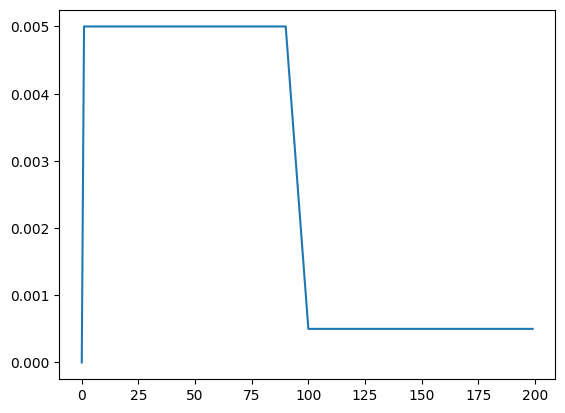

In [29]:
scheduler = WarmupStableDrop(5e-3, 1, 100, drop_iter=10, num_iter=0)
lrs = []
for i in range(200):
    lrs.append(scheduler._current_lr)
    scheduler.step()
plt.plot(lrs)

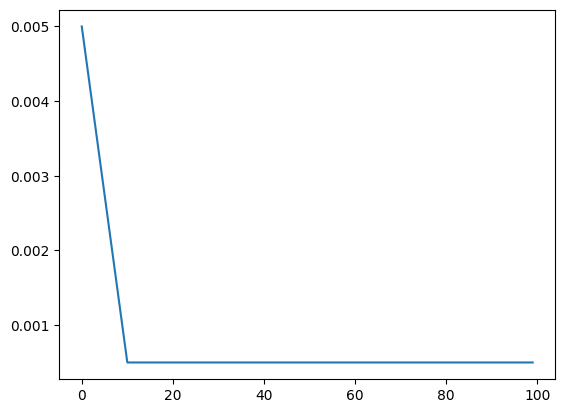

In [34]:
scheduler = WarmupStableDrop(5e-3, 0, 10, drop_iter=10, num_iter=0)
lrs = []
for i in range(100):
    lrs.append(scheduler._current_lr)
    scheduler.step()
plt.plot(lrs)